# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


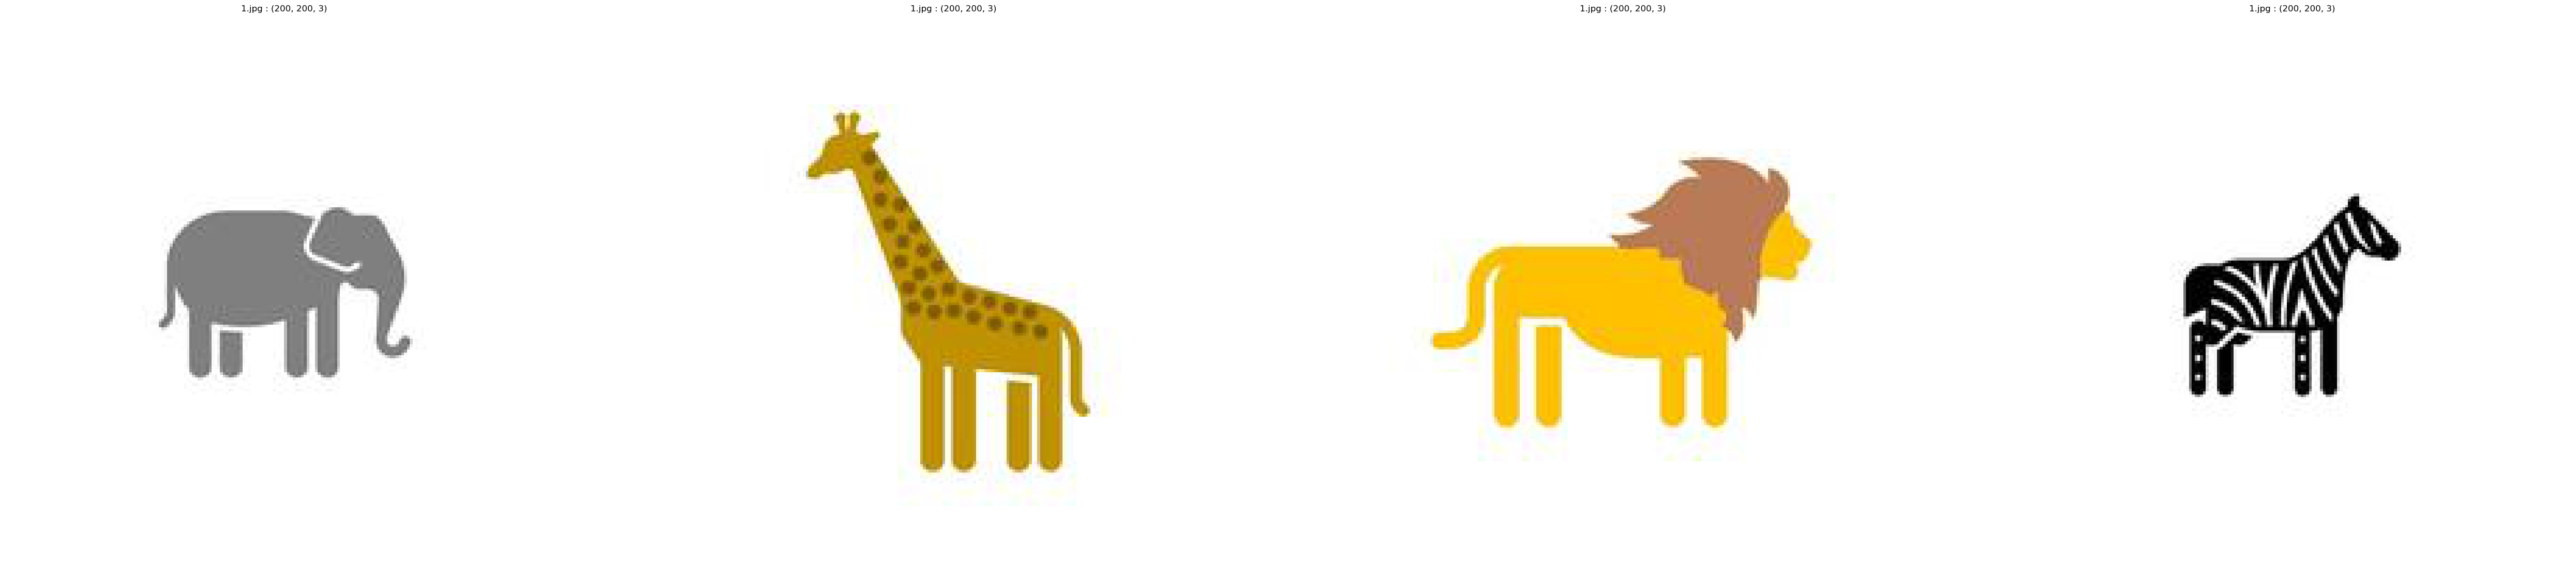

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "safari/safari/training"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(64, 64))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [4]:
#Your libraries here
# !pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import seaborn as sns 

from tensorflow import keras

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [5]:
train_dir = "safari/safari/training/"
test_dir = "safari/safari/test/" 

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                   height_shift_range = 0.1, 
                                   horizontal_flip = True, 
                                   rescale=1./255,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(directory= train_dir,
                                              target_size =(32,32),
                                              batch_size = 32,
                                              class_mode="categorical",
                                              subset="training")
                                              

test_gen = test_datagen.flow_from_directory(directory= test_dir,
                                              target_size =(32,32),
                                              batch_size = 32,
                                              class_mode="categorical"
                                              )


Found 396 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [6]:
# Define the model as a sequence of layers
model = Sequential()
# Input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6),padding='same', activation='relu', input_shape=(32, 32, 3)))
# Add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(64, (6, 6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(128, (6, 6),padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.5))
# Flatten the feature maps 
model.add(Flatten())
# Generate an output layer with a predicted probability for each class
model.add(Dense(4, activation='softmax')) #Should be 4 output classes not 10 
# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Train the model
Train a CNN model with 10 epochs.

In [7]:
#Train Model 
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=10,
    validation_data=test_gen,
    validation_steps=len(test_gen)
)


Epoch 1/10
13/13 [==============================] - 5s 254ms/step - loss: 1.2504 - accuracy: 0.4369 - val_loss: 0.6608 - val_accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 3s 224ms/step - loss: 0.7100 - accuracy: 0.7197 - val_loss: 0.2694 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 3s 226ms/step - loss: 0.4163 - accuracy: 0.8359 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 3s 214ms/step - loss: 0.2046 - accuracy: 0.9318 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 3s 231ms/step - loss: 0.1512 - accuracy: 0.9444 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 3s 233ms/step - loss: 0.0761 - accuracy: 0.9874 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 3s 218ms/step - loss: 0.0547 - accuracy: 0.9899 - val_loss: 6.6163e-04 - val_accuracy: 1.0000
Ep

### View loss history
- To check for overfitting.

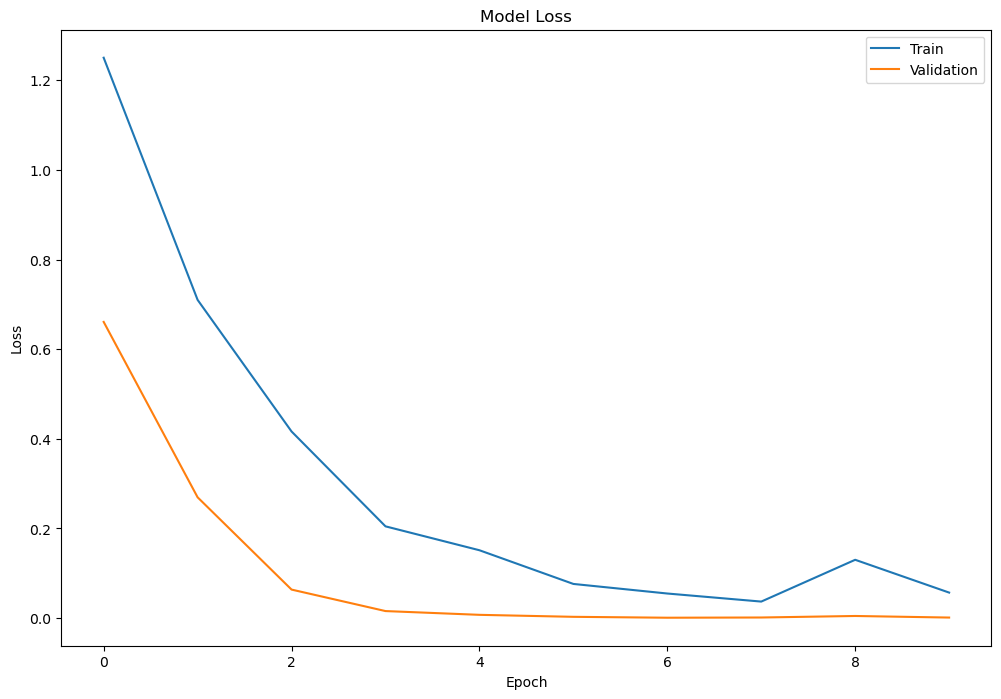

In [8]:
# your code here
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

### Evaluate the model

1/1 [==============================] - 0s 459ms/step


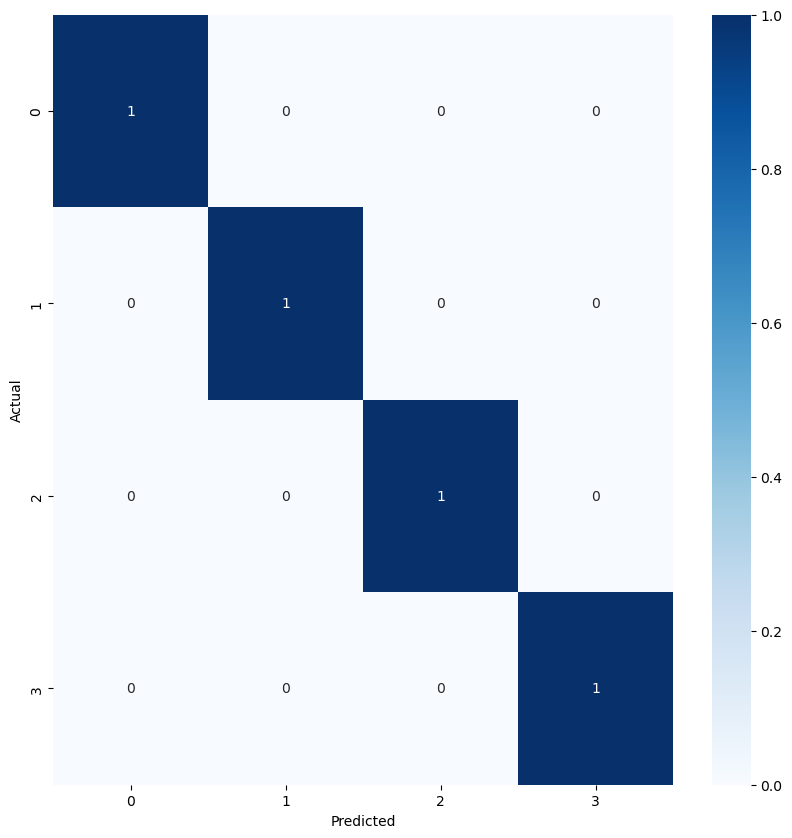

In [9]:
# Get the image and label arrays for the first batch of validation data
x_val_batch, y_val_batch = test_gen.next()

# Use the model to predict the class
predictions = model.predict(x_val_batch)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# The actual labels are one-hot encoded, so get the class with the value 1
actual_classes = np.argmax(y_val_batch, axis=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [10]:
# Code to save your model
model.save_weights('model_weights.h5')
model.save('model.h5')

### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

In [11]:
from tensorflow.keras.models import load_model
# If you want to load the model you need to add 
model = load_model('model.h5')

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def load_and_preprocess_image(image_path):
# Load image (In PIL format)
    img = load_img(image_path, target_size=(32, 32)) # change target_size to match your model input
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Normalize image (scale pixel values to the range [0, 1])
    img_array = img_array / 255.0
    # Add an extra dimension (for the batch)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

1/1 [==============================] - 0s 131ms/step
Overall Prediction is:  [9.9603820e-01 1.7869361e-03 1.4822933e-04 2.0266566e-03]
The confidence is: 0.9960382


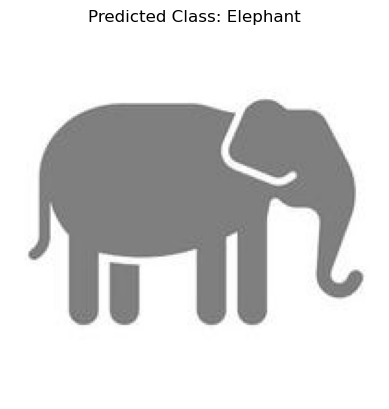

1/1 [==============================] - 0s 80ms/step
Overall Prediction is:  [4.0961599e-09 9.9991345e-01 5.7564390e-05 2.9017747e-05]
The confidence is: 0.99991345


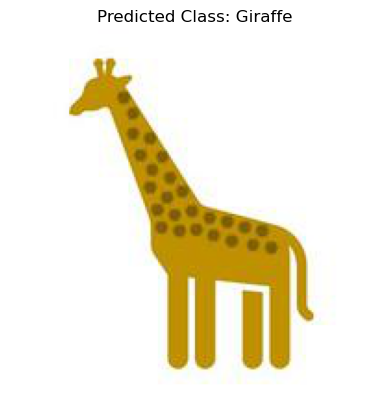

1/1 [==============================] - 0s 75ms/step
Overall Prediction is:  [4.7450676e-12 4.7659370e-05 9.9995232e-01 5.7722307e-09]
The confidence is: 0.9999523


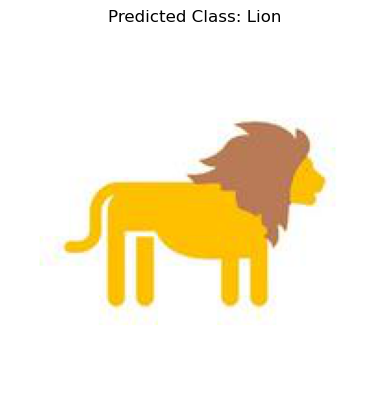

1/1 [==============================] - 0s 67ms/step
Overall Prediction is:  [4.0055168e-11 6.0372402e-11 5.6607511e-19 1.0000000e+00]
The confidence is: 1.0


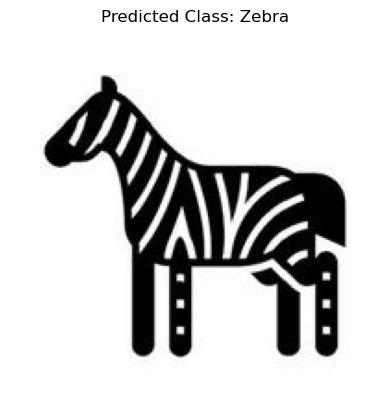

1/1 [==============================] - 0s 54ms/step
Overall Prediction is:  [3.4540246e-08 1.5228387e-04 3.1435021e-09 9.9984765e-01]
The confidence is: 0.99984765


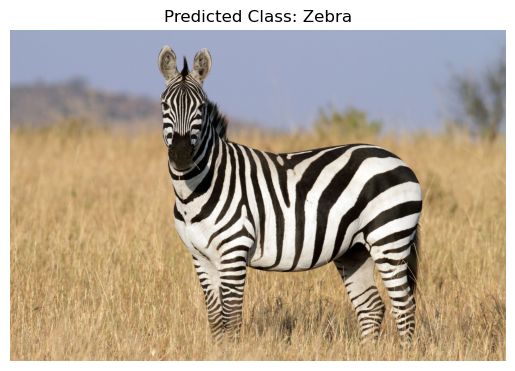

In [19]:
from PIL import Image
labels = ["Elephant","Giraffe","Lion","Zebra"]
pics_dir = ["safari/safari/test/elephant/elephant.jpg",'safari/safari/test/giraffe/giraffe.jpg','safari/safari/test/lion/lion.jpg','safari/safari/test/zebra/zebra.jpg','safari/licensed-image.jpeg']
# Replace 'test.jpg' with the path of the image you want to predict
for animal in pics_dir: 
 img_path = animal 
 img_array = load_and_preprocess_image(img_path)

 # Use the model to predict the class
 predictions = model.predict(img_array)
 predictions = predictions[0]

 # The model returns a probability value for each class
 # The one with the highest probability is the predicted class
 predicted_class = np.argmax(predictions)

 print("Overall Prediction is: ", predictions)
 print("The confidence is:",predictions[predicted_class])
 img = Image.open(img_path)
 plt.imshow(img)
 plt.title(f'Predicted Class: {labels[predicted_class]}')
 plt.axis('off')
 plt.show()


## Web Interface

In [ ]:
# Your code here
import base64
import io

# !pip install dash
# !pip install jupyter_dash

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State
import jupyter_dash

from tensorflow.keras.models import load_model
from PIL import Image


In [ ]:
# Load the pre-trained model
model = load_model('model.h5')

In [ ]:
# Create the app
app = jupyter_dash.JupyterDash(__name__)

In [ ]:
# App layout
app.layout = html.Div([
    html.H1('Image Classifier'),

    # Upload images
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Image')
        ]),
        style={
            'width': '300px',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        }
    ),

    # Display the image
    html.Div(id='output-image-upload'),
    html.Div(id='prediction')
])

In [ ]:
# Helper function to process uploaded image and make predictions
def process_image(image):
    img = Image.open(image)
    img = img.resize((224, 224))  # Resize image to match input size of the model
    img = img.convert('RGB')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

In [ ]:
# Helper function to process uploaded image and make predictions
def process_image(image):
    img = Image.open(image)
    img = img.resize((224, 224))  # Resize image to match input size of the model
    img = img.convert('RGB')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

In [ ]:
# Callback function to handle image upload and make predictions
@app.callback(
    Output('prediction', 'children'), Output('output-image-upload', 'children'), Input('upload-image', 'contents'), State('upload-image', 'filename')
)
def classify_image(contents, filename):
    if contents is not None:
        content_type, content_string = contents.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        processed_image = process_image(image)
        prediction = model.predict(processed_image)
        class_index = tf.argmax(prediction, axis=1)[0]
        class_label = predicted_classes[class_index]  # Replace class_names with your list of class labels
        return (
            html.H3(f'Predicted Class: {class_label}'),
            html.Div([
                html.H5(f'Uploaded Image: {filename}'),
                html.Img(src=contents, style={'width': '300px'})
            ])
        )
    else:
        return html.Div(), html.Div()

In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')

Hopefully, your model predicted all four of the image classes correctly!